In [1]:
## A tutorial script for well log prediction 
# This tutorial is for the most general case:
# inputing 4 values from four existing well logs and predicting the missing S-wave log (DT)
# The advance in this script compared with the earlier one is the usage of depth constraint
# 
# INPUT: P-wave sonic log (DTCO), Gamma-ray (ECGR), Density (RHOB), Total porosity (PHIT)
# OUTPUT: S-wave sonic log (DTSM)

# first download the data from
# Using SVN (deprecated since 01/08/2024)
# !svn co https://github.com/chenyk1990/mldata/trunk/well ./well 
# well4tutorial2.xlsx

# Using Git
# git clone -n --depth=1 --filter=tree:0 https://github.com/chenyk1990/mldata
# cd mldata/
# git sparse-checkout set --no-cone well
# git checkout
# cp well/well4tutorial2.xlsx ./

Restored 'well/log4tutorial.xlsx'
Checked out revision 52.


In [1]:
# Here we introduce a self-attention BiLSTM network for training a model

import numpy as np
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.layers import Activation, Add, Bidirectional, Conv1D, Dense, Dropout, Embedding, Flatten, Reshape, multiply
from keras.layers import concatenate, GRU, Input, LSTM, MaxPooling1D
from keras.layers import GlobalAveragePooling1D,  GlobalMaxPooling1D, SpatialDropout1D
from keras.models import Model
from keras.preprocessing import text, sequence
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.models import Model

def SE_Block(tensor, ratio=8):
    init = tensor
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    filters = int(init.shape[-1])
    se_shape = (1, filters)
    se = GlobalAveragePooling1D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = multiply([init, se])
    x = Add()([x,init])
    return x

inp1 = layers.Input(shape=(8,4),name='input_layer')
D1 = 8
D2 = int(2*D1)
D3 = int(2*D2)
D4 = int(2*D3)
D5 = int(2*D4)

features = Bidirectional(LSTM(D1, return_sequences=True))(inp1)
features = SE_Block(features)
features = Bidirectional(LSTM(D2, return_sequences=True))(features)
features = SE_Block(features)
features = Bidirectional(LSTM(D3, return_sequences=True))(features)
features = SE_Block(features)
features = Bidirectional(LSTM(D4, return_sequences=False))(features)

#features = Dense(D4,activation='relu')(features)
#features = Dense(D3,activation='relu')(features)
#features = Dense(D2,activation='relu')(features)

e = Dense(8)(features)
o = Activation('linear', name='output_layer')(e)
model = Model(inputs=[inp1], outputs=o)
model.summary()


2024-02-25 14:11:36.749978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 8, 4)]               0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 8, 16)                832       ['input_layer[0][0]']         
 al)                                                                                              
                                                                                                  
 global_average_pooling1d (  (None, 16)                   0         ['bidirectional[0][0]']       
 GlobalAveragePooling1D)                                                                          
                                                                                              

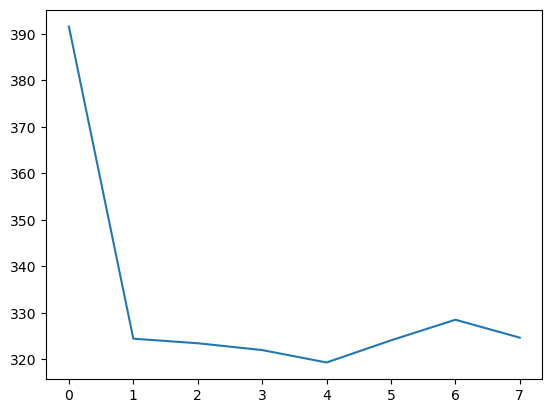

Epoch 1/50
273/274 [============================>.] - ETA: 0s - loss: 18782.8867 - mse: 18782.8867
Epoch 1: val_loss improved from inf to 14220.02539, saving model to best_model_well4tutorial2.h5
274/274 [==============================] - 29s 67ms/step - loss: 18775.3047 - mse: 18775.3047 - val_loss: 14220.0254 - val_mse: 14220.0254 - lr: 0.0010
Epoch 2/50
  1/274 [..............................] - ETA: 15s - loss: 15399.7607 - mse: 15399.7607

/Users/chenyk/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


273/274 [============================>.] - ETA: 0s - loss: 11036.3594 - mse: 11036.3594
Epoch 2: val_loss improved from 14220.02539 to 8333.79785, saving model to best_model_well4tutorial2.h5
274/274 [==============================] - 17s 63ms/step - loss: 11033.5938 - mse: 11033.5938 - val_loss: 8333.7979 - val_mse: 8333.7979 - lr: 0.0010
Epoch 3/50
273/274 [============================>.] - ETA: 0s - loss: 6398.5371 - mse: 6398.5371
Epoch 3: val_loss improved from 8333.79785 to 4796.23584, saving model to best_model_well4tutorial2.h5
274/274 [==============================] - 20s 75ms/step - loss: 6396.5264 - mse: 6396.5264 - val_loss: 4796.2358 - val_mse: 4796.2358 - lr: 0.0010
Epoch 4/50
273/274 [============================>.] - ETA: 0s - loss: 3707.4165 - mse: 3707.4165
Epoch 4: val_loss improved from 4796.23584 to 2839.70312, saving model to best_model_well4tutorial2.h5
274/274 [==============================] - 21s 77ms/step - loss: 3706.6689 - mse: 3706.6689 - val_loss: 2839.7

Epoch 27/50
273/274 [============================>.] - ETA: 0s - loss: 473.4240 - mse: 473.4240
Epoch 27: val_loss improved from 498.32065 to 472.49081, saving model to best_model_well4tutorial2.h5
274/274 [==============================] - 24s 89ms/step - loss: 473.0594 - mse: 473.0594 - val_loss: 472.4908 - val_mse: 472.4908 - lr: 0.0010
Epoch 28/50
273/274 [============================>.] - ETA: 0s - loss: 463.4780 - mse: 463.4780
Epoch 28: val_loss did not improve from 472.49081
274/274 [==============================] - 23s 85ms/step - loss: 463.7161 - mse: 463.7161 - val_loss: 504.3482 - val_mse: 504.3482 - lr: 0.0010
Epoch 29/50
273/274 [============================>.] - ETA: 0s - loss: 447.0055 - mse: 447.0055
Epoch 29: val_loss improved from 472.49081 to 436.68427, saving model to best_model_well4tutorial2.h5
274/274 [==============================] - 21s 76ms/step - loss: 446.6671 - mse: 446.6671 - val_loss: 436.6843 - val_mse: 436.6843 - lr: 0.0010
Epoch 30/50
273/274 [=====

In [4]:
# Bebig the training

import matplotlib.pyplot as plt

import pandas as pd
import tensorflow.keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import keras,os
sgd = tensorflow.keras.optimizers.Adam(lr=1e-3)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                cooldown= 0,
                                patience= 50,
                                min_lr=0.5e-8)

early_stopping_monitor = EarlyStopping(monitor= 'val_loss', patience = 100)

filename='well4tutorial2.xlsx'
for fname in [filename]:
    df = pd.read_excel(fname)
    df_raw_input = df[['DTCO', 'ECGR', 'RHOB', 'PHIT']]
    X = df_raw_input[0:] #df_raw_input[0:-4] in case it is not dividable
    y = df['DTSM'][0:]   #df['DTSM'][0:-4] in case it is not dividable
    
    X=np.array(X)
    y=np.array(y)
    
    X=np.reshape(X,[8,50000,4],order='F').transpose(1,0,2);#.reshape(107777,32,order='F')
    y=np.reshape(y,[8,50000],order='F').transpose(1,0)
    plt.plot(y[0,:]);plt.show()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 	X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
    checkpoint = ModelCheckpoint(filepath='best_model_%s.h5'%(fname.split('.')[0].split('/')[-1]),
                             monitor='val_loss',
                             mode = 'auto',
                             verbose=1,
                             save_best_only=True)
    callbacks = [lr_reducer, early_stopping_monitor, checkpoint]
    model = Model(inputs=[inp1], outputs=o)
    model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
    history = model.fit([X_train], y_train, epochs=50, validation_data=([X_test],y_test), shuffle=True, batch_size=128, callbacks = callbacks)
#100 or 200 epochs will definitely better

In [5]:
## Below is to test
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import os
filename='well4tutorial2.xlsx'
for fname in [filename]:
    df = pd.read_excel(fname)

    df_raw_input = df[['DTCO', 'ECGR', 'RHOB', 'PHIT']]
    X = df_raw_input[0:]
    y = df['DTSM'][0:]
    
    X=np.array(X)
    y=np.array(y)
    
    X=np.reshape(X,[8,50000,4],order='F').transpose(1,0,2);#.reshape(50000,32,order='F')
    y=np.reshape(y,[8,50000],order='F').transpose(1,0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 	X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
    model = load_model('best_model_%s.h5'%(fname.split('.')[0].split('/')[-1])) #current one:  0.8361
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(fname.split('.')[0].split('/')[-1]+' R2:', r2,' RMSE:',rmse)


469/469 [==============================] - 4s 4ms/step
well4tutorial2 R2: 0.717947823992266  RMSE: 18.925946383275843


In [14]:
## Comparison with random forest
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import os
filename='well4tutorial2.xlsx'
for fname in [filename]:
    df = pd.read_excel(fname)

    df_raw_input = df[['DTCO', 'ECGR', 'RHOB', 'PHIT']]
    X = df_raw_input[0:]
    y = df['DTSM'][0:]
    
    X=np.array(X)
    y=np.array(y)
    
    X=np.reshape(X,[8,50000,4],order='F').transpose(1,0,2);#.reshape(50000,32,order='F')
    y=np.reshape(y,[8,50000],order='F').transpose(1,0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

bagged_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, max_samples=0.7, random_state=42)
bagged_model.fit(X_train.reshape(35000*8,4,order='F'), y_train.reshape(35000*8,1,order='F'))

y_pred = bagged_model.predict(X_test.reshape(15000*8,4,order='F'))
r2 = r2_score(y_test.reshape(15000*8,1,order='F'), y_pred)
rmse = mean_squared_error(y_test.reshape(15000*8,1,order='F'), y_pred, squared=False)
print(fname.split('.')[0].split('/')[-1]+' R2:', r2,' RMSE:',rmse)

# If BiLSTM has already been run; uncomment
model = load_model('best_model_%s.h5'%(fname.split('.')[0])) #current one:  0.82
y_pred = model.predict(X_test)
r2 = r2_score(y_test.flatten(), y_pred.flatten())
rmse = mean_squared_error(y_test.flatten(), y_pred.flatten(), squared=False)
print(fname.split('.')[0].split('/')[-1]+' R2:', r2,' RMSE:',rmse)


/Users/chenyk/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/Users/chenyk/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


well4tutorial2 R2: 0.6269690696049068  RMSE: 21.766044103176505
469/469 [==============================] - 3s 3ms/step
well4tutorial2 R2: 0.7179596366649222  RMSE: 18.926169089683395
